# Symbolic Calculation with Sympy

The numerical methods that we have learned so far give numerical approximations to a true value.
* We cannot use them to derive analytic formula or find exact solutions
* we cannot handle problems with unknown parameters

## Example
Solve $x^2-\alpha=0$. 
* This cannot be solved numerically without assigning $\alpha$ a specific value.
* Yet, we know there are two solutions $x=\pm\sqrt\alpha$
* These solutions are found without assigning a value for $\alpha$
* This is an example of symbolic calculation
  * $\alpha$ and $x$ are treated as symbols.

Not all problems have analytic solutions, so not all problems can be solved symbolically.
* However, for the limited set of problems that we can be solved, we get exact solutions and analytic formula

The `sympy` module provides facilities to conduct symbolic calculations

## Symbols 
The key concept for symbolic calculations using the `sympy` module is a symbol.
* Symbol is a python object that have a name and some properties. The name is useful for distinguishing symbols, and for printing.
* A symbol does not have a specific numerical value

There are three commonly used approaches to create a symbol:
### `Symbol` class
A symbol is an object of `Symbol` class
 * So we can construct a symbol using its constructor
 * `Symbol(name)` creates a symbol with the given name
 * it can take muptiple optional arguments about the assumption of the symbol, such as `integer=True` or `real=True` or `positive=True`
 
To use the symbol, we assign the object to a variable. The variable names may be different from symbol name.

### pretty-display a symbol
The `display` function in `IPython.display` displays a symbol (or expression) nicely, using subscripts, supperscripts, and greek letters

In [2]:
from sympy import *
from IPython.display import display

# an integer x1
x1 = Symbol("x1", integer=True)
# a symbol alpha without assumptions
a = Symbol("alpha")
print(x1, a)
display(x1, a)

x1 alpha


x1

alpha

In [3]:
# this is correct, but confusing
x = Symbol("y")
y = Symbol("x")
print("x =", x, " and y =", y)

x = y  and y = x


### `symbols` function
The `symbols` function creates multiple symbols, and return them as a tuple
* `symbols(names)` where names is a string with space or comma separated names
* Optional arguments can be used to specify assumptions of these symbols 
* slice notations can be used to declare a sequence of symbols

In [4]:
x, y, z =symbols("x y z")
a, b = symbols("a, b")
c = symbols("c", real=True)
d0, d1, d2=symbols("d:3") # same as "d0:3"
print(d0, d1, d2)
display(d0, d1, d2)


d0 d1 d2


d0

d1

d2

### `sympy.abc` package
The `sympy.abc` package defines all single-character (both upper and lower case letters) and greek variable name

In [5]:
from sympy.abc import alpha, beta, gamma
display(alpha, beta, gamma)

alpha

beta

gamma

## expressions

A symbolic expression do not evaluate to a value, instead, they represent the specified mathmatical operations.

An expression is also an object

In [13]:
# here cos(1) is not evaluated as a number
print(cos(1))

e=a+b
print(e)
a+1, a*b, a/b, sin(a+b), exp(a/b)

cos(1)
a + b


(a + 1, a*b, a/b, sin(a + b), exp(a/b))

## Commonly used mathematical functions
Commonly used mathematical functions are defined in `sympy`
* They do not evaluate a value, instead rthey represent a mathematical function


In [14]:
cos(x)+log(y)

log(y) + cos(x)

## Simplifying an expression
The `simplify` function trys to simplify an expression using some heuristics
  * Not all expressions are simplifiable

In [156]:
display(cos(x)**2 +sin(x)**2)
display(simplify(cos(x)**2 +sin(x)**2))

sin(x)**2 + cos(x)**2

1

## Solving an equation
The `solve` function solves an equation symbolically

* `solve(eq, var)` where eq is either an equation or an expression
  * Eq(a, y) function represents $\alpha=y$ 
  * If `eq` is an expression, then it is the same as Eq(eq, 0)
  * `var` is the variable to solve
  * it returns a list of solutions
  

In [157]:
roots = solve(x**2-alpha, x)
display(roots)
display(roots[0], roots[1])

[-sqrt(alpha), sqrt(alpha)]

-sqrt(alpha)

sqrt(alpha)

In [158]:
display(solve(x**2-alpha, alpha)[0])

x**2

Note that not all equations are solvable. 

For example, $x=\sin x$ cannot be solved symbolically

In [159]:
solve(sin(x)-x, x)

NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation -x + sin(x)

## Solve a linear system
`linsolve` solves a system of linear equations
* `linsolve(equations, variables)` solves the system of linear equations
  * `equations` is a list equations
  * variable is a tuple (or list) or variables to solve


In [161]:
r=linsolve([alpha*x+beta*y+gamma*z, Eq(x+y+z,2), Eq(x-y,1)], [x,y,z])
display(r)
print(r)

FiniteSet(((beta - 3*gamma)/(alpha + beta - 2*gamma), -(alpha + gamma)/(alpha + beta - 2*gamma), (3*alpha + beta)/(alpha + beta - 2*gamma)))

FiniteSet(((beta - 3*gamma)/(alpha + beta - 2*gamma), -(alpha + gamma)/(alpha + beta - 2*gamma), (3*alpha + beta)/(alpha + beta - 2*gamma)))


The pair of {} represent that the solution is a set.
  * The above example is an object of FiniteSet
    * You may use its args instance variable to access the elements as a list

In [162]:
display(r.args[0])

((beta - 3*gamma)/(alpha + beta - 2*gamma), -(alpha + gamma)/(alpha + beta - 2*gamma), (3*alpha + beta)/(alpha + beta - 2*gamma))

Each root is a tuple

In [163]:
display(r.args[0][0],r.args[0][1], r.args[0][2])

(beta - 3*gamma)/(alpha + beta - 2*gamma)

-(alpha + gamma)/(alpha + beta - 2*gamma)

(3*alpha + beta)/(alpha + beta - 2*gamma)

In [164]:
linsolve([alpha*x+beta*y+gamma*z, Eq(x+y+z,2), Eq(x-y,1)], [x,y])

EmptySet

The above $\emptyset$ means the empty set, i.e., no solutions

## Solving nonlinear systems
The `nonlinsolve` function solves a nonlinear system. Note that not all systems are solvable.

### Example
Solve 
\begin{align}
x^2+y^2&=1\\
xy&=\alpha
\end{align}


In [165]:
nonlinsolve([x**2+y**2-1, Eq(x*y, alpha)], [x,y])

FiniteSet((-sqrt(1/2 - sqrt(1 - 4*alpha**2)/2)*(sqrt(1/2 - sqrt(1 - 4*alpha**2)/2) - 1)*(sqrt(1/2 - sqrt(1 - 4*alpha**2)/2) + 1)/alpha, sqrt(1/2 - sqrt(1 - 4*alpha**2)/2)), (-sqrt(sqrt(1 - 4*alpha**2)/2 + 1/2)*(sqrt(sqrt(1 - 4*alpha**2)/2 + 1/2) - 1)*(sqrt(sqrt(1 - 4*alpha**2)/2 + 1/2) + 1)/alpha, sqrt(sqrt(1 - 4*alpha**2)/2 + 1/2)), (sqrt(1/2 - sqrt(1 - 4*alpha**2)/2)*(1 - sqrt(1/2 - sqrt(1 - 4*alpha**2)/2))*(-sqrt(1/2 - sqrt(1 - 4*alpha**2)/2) - 1)/alpha, -sqrt(1/2 - sqrt(1 - 4*alpha**2)/2)), ((1 - sqrt(sqrt(1 - 4*alpha**2)/2 + 1/2))*sqrt(sqrt(1 - 4*alpha**2)/2 + 1/2)*(-sqrt(sqrt(1 - 4*alpha**2)/2 + 1/2) - 1)/alpha, -sqrt(sqrt(1 - 4*alpha**2)/2 + 1/2)))

## Substitution
The `subs` method substitutes a symbol with a value (an expression)
* it takes a dictionary as input
  * A key is a variable to replace
  * the corresponding value is the value to substitute
  

In [166]:
display(e)
e.subs({a:x**2, b:y**2})

a + b

x**2 + y**2

## Numerical evaluation
There are two approachs to evaluate an expression numerically
* Use the `subs` method to substitute a float value to a symbol

In [167]:
display(e)
e.subs({a:1, b:2})

a + b

3

### lambdify
`lambdify(vars, e)` creates a lambda function from an expression
*  vars are the arugments, and e is the expression


In [168]:
f = lambdify([x, y], sqrt(x**2+y**2))
f(2, 2)

2.8284271247461903

In [169]:
# this does not work because alpha is a free symbol
f = lambdify([x, y], sqrt(x**2+y**2-alpha))
f(2, 2)

TypeError: loop of ufunc does not support argument 0 of type Add which has no callable sqrt method

# Example
An equilibrium $x^*$ of a difference equation $x_{t+1}=f(x_t)$ is a constant solution $x_t=x^*$, i.e., $x^*=f(x^*)$

Consider the SIR model with births and deaths
\begin{align}
S_{t+1}-S_t & = -\beta S_tI_t+\mu-\mu S_t\\
I_{t+1} -I_t & = \beta S_tI_t - \gamma I - \mu I
\end{align}
Thus, a fixed point satisfies
\begin{align}
0 & = -\beta SI+\mu-\mu S\\
0 & = \beta SI - \gamma I - \mu I
\end{align}


In [30]:
from sympy.abc import mu, S, I, beta
from sympy import exp
eqS = -beta*S*I+mu-mu*S
eqI = beta*S*I - gamma*I - mu*I
E=nonlinsolve([eqS, eqI], [S, I])
display(E)

{(1, 0), (-(-mu + mu*(beta - gamma - mu)/beta)/mu, mu*(beta - gamma - mu)/(beta*(gamma + mu)))}

This system has two equilibria,
$$E_1=(1,0)$$

and $E_2=(E_S, E_I)$:

In [31]:
ES, EI = E.args[1]
ES = simplify(ES)
EI = simplify(EI)
display(ES, EI)

(gamma + mu)/beta

mu*(beta - gamma - mu)/(beta*(gamma + mu))

Given $\displaystyle\mu=\frac{1}{80\times 365}$ and $\gamma=0.25$, how does $E_I$ change with $\beta$?

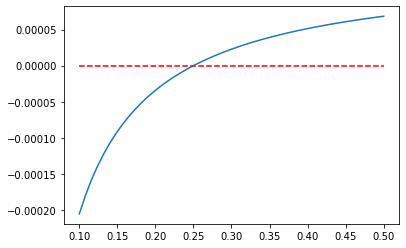

In [33]:
f=lambdify(beta, EI.subs({gamma:0.25, mu:1.0/80/365}))
from numpy import linspace, zeros
b = linspace(0.1, 0.5, 51)

from matplotlib.pyplot import plot
plot(b, f(b), b, zeros(len(b)), "--r")

The the equilibrium value of $I$ increases with $\beta$. There is a critical value of $\beta$ that makes $I>0$. 

What is this critical value? we need to solve $E_I(\beta)=0$

In [ ]:
solve(EI, beta)

That is, $\beta>\mu+\gamma$ guarantees that $I>0$